In [2]:
import numpy as num
import pylab as lab
import scipy as sci
import pandas as pan
%matplotlib inline

In [172]:
re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.771916, 2.336509, 34.108882, 7.079952, 3.775974, 0.449644, 0.593713,\
0.413484, 0.826967, -4.099542, -0.754764, 1.766503, -1.578274, -4.17, 0,\
3.474733,  2.288323,  1.39349,  -4.174332,10

In [173]:
re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.771916, 2.336509, 34.108882, 7.079952, 3.775974, 0.449644,\
0.593713, 0.413484, 0.826967, -4.099542, -0.754764, 1.766503,\
-1.578274, -4.17, 0, 3.474733,  2.288323,  1.39349,  -4.174332,10

In [174]:
def f(r,q,N):
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))



def F(rho):
    func=[]
    rhon=0.85*rhoe
    rho0=1.15*rhoe
    for var in rho:
        if(rho<rhon):
            func.append( Fn0*(rho/rhon-1)**0+Fn1*(rho/rhon-1)**1+Fn2*(rho/rhon-1)**2+Fn3*(rho/rhon-1)**3)
        elif (rho>=rhon and rho<rho0):
            func.append(F0*(rho/rhoe-1)**0+F1*(rho/rhoe-1)**1+F2*(rho/rhoe-1)**2+F3*(rho/rhoe-1)**3)
        else:
            func.append(Fe*(1-num.log((rho/rhoe)**eta))*(rho/rhoe)**eta)
    
    func=num.asarray(func)
    return func
        
def phiN(r):
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE(r):
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)
def phiT(r):
    return phiN(r)-phiE(r)



In [175]:
x=num.linspace(0,10,1000)
rhon=0.85*rhoe
rho0=1.15*rhoe
rhon,rho0

(28.9925497, 39.2252143)

In [176]:
rho=rhon
print F0*(rho/rhoe-1)**0+F1*(rho/rhoe-1)**1+F2*(rho/rhoe-1)**2+F3*(rho/rhoe-1)**3
print Fe*(1-num.log((rho/rhoe)**eta))*(rho/rhoe)**eta

SyntaxError: invalid syntax (<ipython-input-176-ee6350a5e91f>, line 2)

In [177]:
Fe*(1-num.log((rhon/rhoe)**eta))*(rhon/rhoe)**eta

-4.0821538212178545

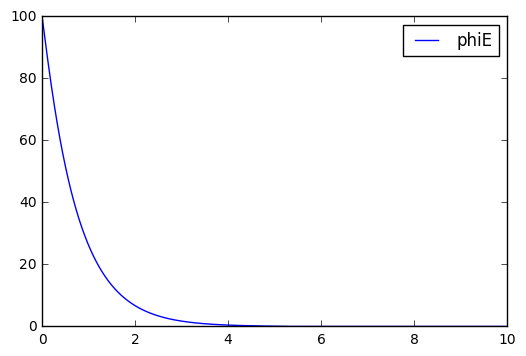

In [178]:
fig=lab.figure()
#lab.plot(x,phi(x),label="phi")
#lab.plot(x,phiN(x),label="phiN")

lab.plot(x,f(x,0,N),label="phiE")
#lab.xlim([0,5])
#lab.ylim([0,30])
lab.legend()
lab.show()



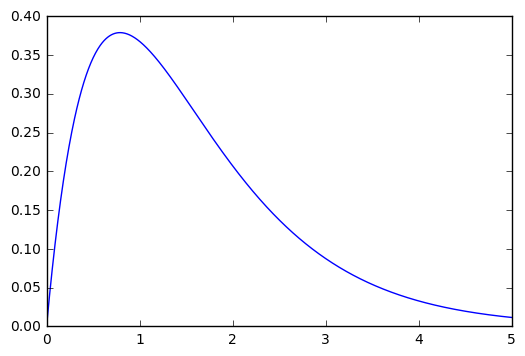

In [179]:
r=num.linspace(0.001,5,1000)
rhoe=num.multiply(10*0.1305*r,num.exp(-1.2663*r))

lab.plot(r,rhoe)
lab.show()

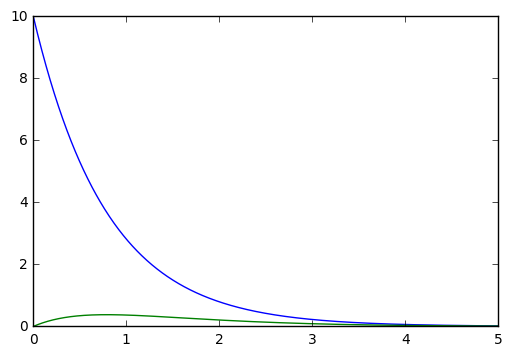

In [180]:
rhon=lambda r:10*num.exp(-1.2663*r)
rhoe=lambda r:num.multiply(10*0.1305*r,num.exp(-1.2663*r))
lab.plot(r,rhon(r),r,rhoe(r))
lab.show()

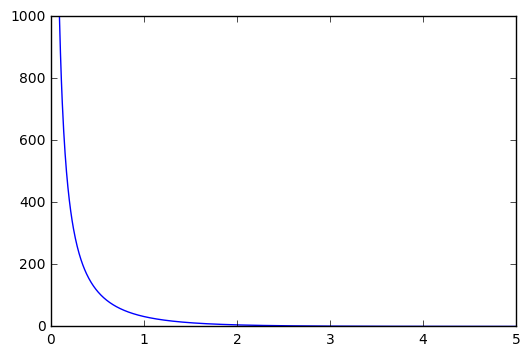

In [181]:
Z=lambda r:rhon(r)+rhoe(r)
lab.plot(r,Z(0)*Z(r)/r)
lab.ylim([0,1000])
lab.show()

In [182]:
78/465.,fe,78/32.

(0.16774193548387098, 2.336509, 2.4375)

In [183]:
B/fe

0.25410259493971565

In [184]:
A/0.1677

2.6812403100775195

In [185]:
x=num.linspace(0,10,1000)
phiE(0),f(0,0,10)
fe,re,beta,lam=1.554485,2.556162,4.090619,0.86214
f_e=lambda r: fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)
f_N=lambda r: 0.16*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
from scipy import integrate
print integrate.quad(f_e,0,100)
print f_e(0)
lab.plot(x,f_e(x),label="ele")
lab.legend(loc=1)
lab.show()

SyntaxError: invalid syntax (<ipython-input-185-e5071671a8ba>, line 7)

In [186]:
Z=pan.read_csv("Pt.u3.Z.dat",sep="\t",names=["r","Z"])
ZFrame=pan.DataFrame(Z)
phi=(ZFrame.Z)**2/ZFrame.r
lab.plot(ZFrame.r,phi,label="Daw")
lab.plot(ZFrame.r,phiT(ZFrame.r),label="Zhou")
lab.legend(loc=1)
lab.ylim([0,600])
lab.xlim([0,5])
lab.show()


OSError: File b'Pt.u3.Z.dat' does not exist

In [187]:

x=num.linspace(0,10,100)

def fPt(r,q):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.771916, 2.336509, 34.108882, 7.079952, 3.775974, 0.449644, 0.593713,\
0.413484, 0.826967, -4.099542, -0.754764, 1.766503, -1.578274, -4.17, 0,\
3.474733,  2.288323,  1.39349,  -4.174332,10
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))



def fCu(r,q):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.556162, 1.554485, 22.150141, 7.669911, 4.090619, 0.327584, 0.468735,\
0.431307, 0.86214,  -2.176490, -0.140035, 0.285621, -1.750834, -2.19, 0, 0.702991,\
0.683705,  0.92115,  -2.191675,11
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

def fCo(r,q):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
    2.505979, 1.975299, 27.206789, 8.679625, 4.629134, 0.421378, 0.640107, 0.5,\
    1.0,      -2.541799, -0.219415, 0.733381, -1.589003, -2.56, 0, 0.705845, -0.687140,  0.694608, -2.559307,9
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

f_Cu=fCu(x,0)
f_Pt=fPt(x,0)
f_Co=fCo(x,0)

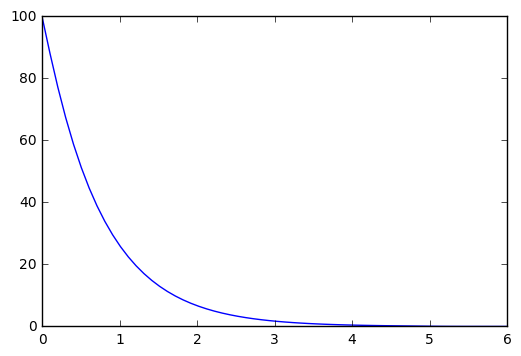

[  8.97603230e+01   7.92516996e+01   6.94457178e+01   6.06526876e+01
   5.29005909e+01   4.61143738e+01   4.01905620e+01   3.50252013e+01
   3.05229719e+01   2.65992734e+01   2.31799135e+01   2.02001041e+01
   1.76033509e+01   1.53404138e+01   1.33683806e+01   1.16498552e+01
   1.01522488e+01   8.84716197e+00   7.70984602e+00   6.71873373e+00
   5.85503042e+00   5.10235747e+00   4.44644175e+00   3.87484499e+00
   3.37672784e+00   2.94264441e+00   2.56436305e+00   2.23471033e+00
   1.94743496e+00   1.69708927e+00   1.47892590e+00   1.28880775e+00
   1.12312958e+00   9.78749583e-01   8.52929840e-01   7.43284362e-01
   6.47733777e-01   5.64465677e-01   4.91899670e-01   4.28655959e-01
   3.73525848e-01   3.25441644e-01   2.83441882e-01   2.46625415e-01
   2.14085405e-01   1.84815651e-01   1.57603122e-01   1.31007231e-01
   1.03729138e-01   7.57473218e-02   4.95138882e-02   2.87566703e-02
   1.51707339e-02   7.53800016e-03   3.64174501e-03   1.74672961e-03
   8.41489865e-04   4.09551730e-04

In [188]:
fig=lab.figure()
lab.plot(x,f_Pt,label="Pt_f")
#lab.plot(x,f_Cu,label="Cu_f")
#lab.plot(x,f_Co,label="Co_f")
#lab.legend(loc=1)
lab.xlim([0,6])
lab.show()
print(fPt(x,1))

In [189]:
Zhou=pan.read_csv("Zhou.info.dat",sep="\t",names=["atom","type","lat","re","fe","rhoe","alpha","beta","A","B"\
                                                     ,"kappa","lam","Fn0","Fn1","Fn2","Fn3","F0","F1","F2","F3","eta","Fe"])

OSError: File b'Zhou.info.dat' does not exist

In [190]:
Zhou

NameError: name 'Zhou' is not defined

In [124]:
def fEle(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)

def phiN_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiT_(r,n,frame):
    return phiN_(r,n,frame)+phiE_(r,n,frame)



def F_(rho,n,frame):
    func=[]
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    rhon=0.85*rhoe
    rho0=1.15*rhoe
    for var in rho:
        if(var<rhon):
            func.append(Fn0*(var/rhon-1)**0+Fn1*(var/rhon-1)**1+Fn2*(var/rhon-1)**2+Fn3*(var/rhon-1)**3)
        elif (var>=rhon and var<rho0):
            func.append(F0*(var/rhoe-1)**0+F1*(var/rhoe-1)**1+F2*(var/rhoe-1)**2+F3*(var/rhoe-1)**3)
        else:
            func.append(Fe*(1-num.log((var/rhoe)**eta))*(var/rhoe)**eta)
    func=num.asarray(func)
    return func

In [192]:
x=num.linspace(0,100,1000)
F=pan.read_csv("Cu_u3.F.dat",sep="\t",names=["rho","F"])
FFrame=pan.DataFrame(F)
FFunc=interp1d(FFrame.rho,FFrame.F)
#lab.plot(FFrame.rho,FFunc(FFrame.rho))
var=0
#lab.plot(x,F_(x,var,Zhou),label=Zhou.atom[var])
lab.plot(x,F_(x,var,Zhou),FFrame.rho,FFunc(FFrame.rho))

#lab.legend(loc=1)
lab.xlim([0,0.2])
#lab.ylim([-5,0])
lab.savefig("fele.pdf")
lab.show()

OSError: File b'Cu_u3.F.dat' does not exist

In [193]:
for var in [0]:
    lab.plot(x,phiT_(x,var,Zhou),label=Zhou.atom[var])

lab.legend(loc=1)
lab.xlim([0,5])    
lab.show()

NameError: name 'Zhou' is not defined

In [194]:
for atoms in [5]:
    lab.plot(x,fEle(x,atoms,Zhou),label=Zhou.atom[atoms])

lab.legend(loc=1)
lab.xlim([0,5])
#lab.ylim([-1,0])
lab.show()

NameError: name 'Zhou' is not defined

In [195]:
def Energy(x,n,frame):
    density=12*fEle(x,n,frame)
    potential=12*phiT_(x,n,frame)
    embedded=F_(density,n,frame)
    return potential+embedded

In [196]:
for atoms in range(5,6):
    lab.plot(x,Energy(x,atoms,Zhou),label=Zhou.atom[atoms])

lab.legend(loc=1)
lab.ylim([-1,2])
lab.xlim([3,6]) 
lab.show()

NameError: name 'Zhou' is not defined

In [197]:
from scipy.interpolate import interp1d
Z=pan.read_csv("Pt.u3.Z.dat",sep="\t",names=["r","Z"])
ZFrame=pan.DataFrame(Z)
ZFunc = interp1d(ZFrame.r, ZFrame.Z, kind='cubic')
lab.plot(ZFrame.r,ZFunc(ZFrame.r))

OSError: File b'Pt.u3.Z.dat' does not exist

In [198]:
F=pan.read_csv("Cu_u3.F.dat",sep="\t",names=["rho","F"])
FFrame=pan.DataFrame(F)
FFunc=interp1d(FFrame.rho,FFrame.F)
lab.plot(FFrame.rho,FFunc(FFrame.rho))

OSError: File b'Cu_u3.F.dat' does not exist

In [199]:
rho=pan.read_csv("Pt_u3.rho.dat",sep="\t",names=["r","rho"])
RhoF=pan.DataFrame(rho)
RFunc=sci.interp1d(RhoF.r,RhoF.rho)
lab.plot(RhoF.r,RFunc(RhoF.r))
lab.ylim([0,0.20])

AttributeError: module 'scipy' has no attribute 'interp1d'

In [200]:
def EnergyDaw(r):
    density=12*RFunc(r)
    Potential=ZFunc(r)*ZFunc(r)/r
    Embedded=FFunc(density)
    return Potential+Embedded



In [201]:

lab.plot(r,EnergyDaw(r))

NameError: name 'RFunc' is not defined

In [3]:
def F2004(rhoVar,rhoe,rhos,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,Fe,eta):
    rhon=0.25*rhoe
    rho0=1.15*rhoe
    func=[]
    for rho in rhoVar:
        if(rho<rhon):
            func.append(Fn0*(rho/rhon-1)**0+Fn1*(rho/rhon-1)**1+Fn2*(rho/rhon-1)**2+Fn3*(rho/rhon-1)**3)
        elif (rho>=rhon and rho<rho0):
            func.append(F0*(rho/rhoe-1)**0+F1*(rho/rhoe-1)**1+F2*(rho/rhoe-1)**2+F3*(rho/rhoe-1)**3)
        else:
            func.append(Fe*(1-num.log((rho/rhos)**eta))*(rho/rhos)**eta)
    func=num.asarray(func)*23.06
    return func
    
    


def FO(rhoVar,rhoe,rho_min,rho_max,\
       F00,F01,F02,F03,F04,\
       F10,F11,F12,F13,F14,\
      F20,F21,F22,F23,F24,\
      F30,F31,F32,F33,F34):
    func=[]
    for rho in rhoVar:
        if (rho>=rho_min[0] and rho<rho_max[0]):
            func.append(F00*((rho/rhoe[0])-1)**0+F20*((rho/rhoe[0])-1)**2+F10*((rho/rhoe[0])-1)**1+\
                    F30*((rho/rhoe[0])-1)**3)
        if (rho>=rho_min[1] and rho<rho_max[1]):
            func.append(F01*((rho/rhoe[1])-1)**0+F21*((rho/rhoe[1])-1)**2+F11*((rho/rhoe[1])-1)**1+\
                    F31*((rho/rhoe[1])-1)**3)
        if (rho>=rho_min[2] and rho<rho_max[2]):
            func.append(F02*((rho/rhoe[2])-1)**0+F22*((rho/rhoe[2])-1)**2+F12*((rho/rhoe[2])-1)**1+\
                    F32*((rho/rhoe[2])-1)**3)
        if (rho>=rho_min[3] and rho<rho_max[3]):
            func.append(F03*((rho/rhoe[3])-1)**0+F23*((rho/rhoe[3])-1)**2+F13*((rho/rhoe[3])-1)**1+\
                    F33*((rho/rhoe[3])-1)**3)
        if (rho>=rho_min[4] and rho<rho_max[4]):
            func.append(F04*((rho/rhoe[4])-1)**0+F24*((rho/rhoe[4])-1)**2+F14*((rho/rhoe[4])-1)**1+\
                    F34*((rho/rhoe[4])-1)**3)
    func=num.asarray(func)*23.06
    return func
    


def f(r,q,N,fe,beta,re,lam):
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

def phiN(r,A,alpha,re,kappa):
    return (A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20))*23.06
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE(r,B,beta,re,kappa):
    return (B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20))*23.06
def phiT(r,A,alpha,re,B,beta,kappa):
    return phiN(r,A,alpha,re,kappa)-phiE(r,B,beta,re,kappa)

In [4]:
re_O,A_O,alpha_O,B_O,beta_O,lam_O,fe_O,kappa_O=3.64857,0.34900,5.44072,0.57438,3.59746,0.39310,1.39479,0.08007


re_Al,A_Al,alpha_Al,B_Al,beta_Al,lam_Al,fe_Al,kappa_Al=2.86392,0.31487,6.61317,0.36555,3.52702,0.75969,1.20378,0.37985

A_AlO,alpha_AlO,re_AlO,B_AlO,beta_AlO,kappa_AlO=0.09738,8.49741,2.98520,0.38121,4.52114,0.18967


re_Al04,A_Al04,alpha_Al04,B_Al04,beta_Al04,lam_Al04,fe_Al04,kappa_Al04=2.863924,0.134873,6.613165,0.365551,3.527021,0.759692,\
                    1.403115,0.379846
    
    
r=num.linspace(2,3,1000)

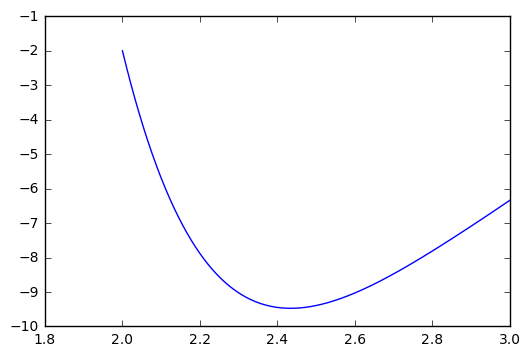

In [5]:
phiO_Al=phiT(r,A_AlO,alpha_AlO,re_AlO,B_AlO,beta_AlO,kappa_AlO)
lab.plot(r,phiO_Al)

In [6]:
f_Al=f(r,0,3,fe_Al,beta_Al,re_Al,lam_Al)
f_Al04=f(r,0,3,fe_Al04,beta_Al04,re_Al04,lam_Al04)

In [7]:
f_O=f(r,0,6,fe_O,beta_O,re_O,lam_O)

In [8]:
phiAl_Al=phiT(r,A_Al,alpha_Al,re_Al,B_Al,beta_Al,kappa_Al)
phiAl_Al04=phiT(r,A_Al04,alpha_Al04,re_Al04,B_Al04,beta_Al04,kappa_Al04)

In [9]:
phiO_O=phiT(r,A_O,alpha_O,re_O,B_O,beta_O,kappa_O)

In [10]:
phiAl_OJonson=(1/2)*((f_Al/f_O)*phiO_O+(f_O/f_Al)*phiAl_Al)

phiAl_OJonson04=(1/2)*((f_Al04/f_O)*phiO_O+(f_O/f_Al04)*phiAl_Al04)

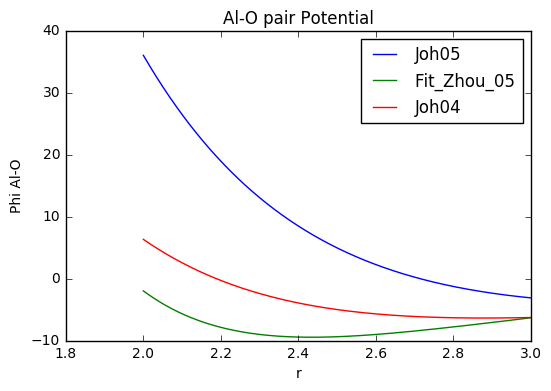

In [11]:
lab.plot(r,phiAl_OJonson,label="Joh05")
lab.plot(r,phiO_Al,label="Fit_Zhou_05")
lab.plot(r,phiAl_OJonson04,label="Joh04")
lab.title("Al-O pair Potential")
lab.xlabel("r")
lab.ylabel("Phi Al-O")
lab.legend()
lab.savefig("AlO.eps")
lab.show()

In [12]:
#Oxygen Parameters


rhominO=[0,54.62910,65.24078,66.56797,70.57748]
rhomaxO=[54.62910,65.24078,66.56797,70.57748,10**10]
rhoe_O=[54.62910,64.26953,66.21202,66.92391,74.23105]
F0=[-1.56489,-1.58967,-1.54116,-1.51798,-1.19082]
F1=[-1.39123,1.30636,2.02821,2.30979,4.12936]
F2=[1.77199,9.81033,6.56240,7.69582,10.32338]
F3=[1.59833,0,0,0,0]
re_O,A_O,alpha_O,B_O,beta_O,lam_O,fe_O,kappa_O=3.64857,0.34900,5.44072,0.57438,3.59746,0.39310,1.39479,0.08007
gamma_O,nu_O=2.11725,0.37457
N_O=6


In [13]:
#Platinium parameters 2004
re_Pt,fe_Pt,rhoe_Pt,rhos_Pt,alpha_Pt,beta_Pt,A_Pt,B_Pt,kappa_Pt,lambda_Pt,\
Fn0_Pt,Fn1_Pt,Fn2_Pt,Fn3_Pt,F0_Pt,F1_Pt,F2_Pt,F3_Pt,eta_Pt,Fe_Pt,rhol_Pt,rhoh_Pt=2.771916,2.336509,33.367564,35.205357,7.105782,3.78975,0.556398,0.696037,0.385255,0.77051,\
-1.455568,-2.149952,0.528491,1.222875,-4.17, 0,  3.010561, -2.420128, 1.45,-4.145597,0.25,1.15
N_Pt=10

In [14]:
#density at Pt due to O
r=2
q_Pt=1
q_O=-q_Pt
rho_Pt=f(r,q_O,N_O,fe_O,gamma_O,re_O,nu_O)
print("Density at Pt due to O",rho_Pt)
#Embedded energy of Pt
F_Pt=F2004([rho_Pt],rhoe_Pt,rhos_Pt,Fn0_Pt,Fn1_Pt,Fn2_Pt,Fn3_Pt,F0_Pt,F1_Pt,F2_Pt,F3_Pt,Fe_Pt,eta_Pt)
print("Embedded energy of Pt",F_Pt)

#density at O due to Pt
rho_O=f(r,q_Pt,N_Pt,fe_Pt,beta_Pt,re_Pt,lambda_Pt)
print("Density at O due to Pt",rho_O)

#Embedded energy of O
F_O=FO([rho_O],rhoe_O,rhominO,rhomaxO,\
       F0[0],F0[1],F0[2],F0[3],F0[4],\
       F1[0],F1[1],F1[2],F1[3],F1[4],\
      F2[0],F2[1],F2[2],F2[3],F2[4],\
      F3[0],F3[1],F3[2],F3[3],F3[4])
print("Embedded energy of O",F_O)

# johnson potential
f_Pt=f(r,q_Pt,N_Pt,fe_Al,beta_Al,re_Al,lam_Al)
f_O=f(r,q_O,N_O,fe_O,gamma_O,re_O,nu_O)
phiPt=phiT(r,A_Pt,alpha_Pt,re_Pt,B_Pt,beta_Pt,kappa_Pt)
phiO=phiT(r,A_O,alpha_O,re_O,B_O,beta_O,kappa_O)
phiPt_O=(1/2)*((rho_Pt/f_O)*phiO+(f_O/f_Pt)*phiPt)
print("PairPotenial",phiPt_O)


#self energy of O
O_self=(.5*529*(q_O-(-0.40))**2+(-141.006))
print("Self energy of O with V0",O_self)

O_selfWithoutV0=(.5*529*(q_O-(-0.40))**2)
print("Self energy of O without V0",O_selfWithoutV0)


#self energy of Pt
Pt_self=(.5*351*(q_Pt-0.0001)**2+(-0.39))
print("self enrgy of Pt wih V0",Pt_self)

Pt_selfWithoutV0=(.5*351*(q_Pt-0.0001)**2)
print("Self energy of Pt without V0",Pt_selfWithoutV0)
#total energy
Etot=F_O[0]+F_Pt[0]+phiPt_O+Pt_self+O_self
print("Total Energy",Etot)

Density at Pt due to O 4.23571803805
Embedded energy of Pt [-9.57180705]
Density at O due to Pt 6.04152944819
Embedded energy of O [-1.16033794]
PairPotenial 44.8786870432
Self energy of O with V0 -45.786
Self energy of O without V0 95.22
self enrgy of Pt wih V0 175.074901755
Self energy of Pt without V0 175.464901755
Total Energy 163.43544381


In [15]:
# uncharged
#density at Pt due to O
r=2
q_Pt=0
q_O=-q_Pt
rho_PtU=f(r,q_O,N_O,fe_O,gamma_O,re_O,nu_O)
print("Density at Pt due to O",rho_PtU)
#Embedded energy of Pt
F_PtU=F2004([rho_PtU],rhoe_Pt,rhos_Pt,Fn0_Pt,Fn1_Pt,Fn2_Pt,Fn3_Pt,F0_Pt,F1_Pt,F2_Pt,F3_Pt,Fe_Pt,eta_Pt)
print("Embedded energy of Pt",F_PtU)

#density at O due to Pt
rho_OU=f(r,q_Pt,N_Pt,fe_Pt,beta_Pt,re_Pt,lambda_Pt)
print("Density at O due to Pt",rho_OU)

#Embedded energy of O
F_OU=FO([rho_OU],rhoe_O,rhominO,rhomaxO,\
       F0[0],F0[1],F0[2],F0[3],F0[4],\
       F1[0],F1[1],F1[2],F1[3],F1[4],\
      F2[0],F2[1],F2[2],F2[3],F2[4],\
      F3[0],F3[1],F3[2],F3[3],F3[4])
print("Embedded energy of O",F_OU)

# johnson potential
f_PtU=f(r,q_Pt,N_Pt,fe_Al,beta_Al,re_Al,lam_Al)
f_OU=f(r,q_O,N_O,fe_O,gamma_O,re_O,nu_O)
phiPtU=phiT(r,A_Pt,alpha_Pt,re_Pt,B_Pt,beta_Pt,kappa_Pt)
phiOU=phiT(r,A_O,alpha_O,re_O,B_O,beta_O,kappa_O)
phiPt_OU=(1/2)*((rho_Pt/f_O)*phiOU+(f_O/f_Pt)*phiPtU)
print("PairPotenial",phiPt_OU)


#self energy of O
O_selfU=(.5*529*(q_O-(-0.40))**2+(-141.006))
print("Self energy of O with V0",O_selfU)

O_selfWithoutV0U=(.5*529*(q_O-(-0.40))**2)
print("Self energy of O without V0",O_selfWithoutV0U)


#self energy of Pt
Pt_selfU=(.5*351*(q_Pt-0.0001)**2+(-0.39))
print("self enrgy of Pt wih V0",Pt_selfU)

Pt_selfWithoutV0U=(.5*351*(q_Pt-0.0001)**2)
print("Self energy of Pt without V0",Pt_selfWithoutV0U)
#total energy
EtotU=F_OU[0]+F_PtU[0]+phiPt_OU+Pt_selfU+O_selfU
print("Total Energy",EtotU)

Density at Pt due to O 3.63061546119
Embedded energy of Pt [-6.75786246]
Density at O due to Pt 6.71281049799
Embedded energy of O [-1.38152978]
PairPotenial 44.8786870432
Self energy of O with V0 -98.68599999999999
Self energy of O without V0 42.32000000000001
self enrgy of Pt wih V0 -0.389998245
Self energy of Pt without V0 1.7550000000000001e-06
Total Energy -62.3367034435


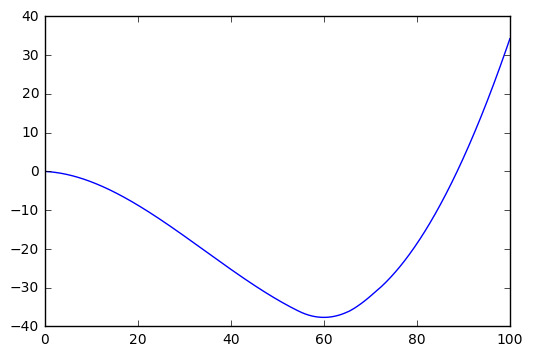

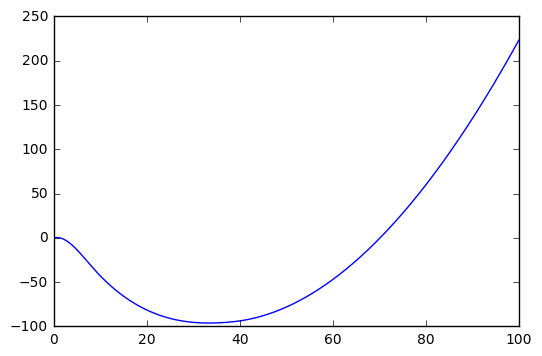

In [16]:
rhogiv=num.linspace(0,100,1000)
F_Otest=FO(rhogiv,rhoe_O,rhominO,rhomaxO,\
       F0[0],F0[1],F0[2],F0[3],F0[4],\
       F1[0],F1[1],F1[2],F1[3],F1[4],\
      F2[0],F2[1],F2[2],F2[3],F2[4],\
      F3[0],F3[1],F3[2],F3[3],F3[4])
lab.plot(rhogiv,F_Otest)
lab.show()
F_Pttest=F2004(rhogiv,rhoe_Pt,rhos_Pt,Fn0_Pt,Fn1_Pt,Fn2_Pt,Fn3_Pt,F0_Pt,F1_Pt,F2_Pt,F3_Pt,Fe_Pt,eta_Pt)
lab.plot(rhogiv,F_Pttest)

In [17]:
Density at Pt due to O 3.63061546119
Embedded energy of Pt [-0.29305561]
Density at O due to Pt 6.71281049799
Embedded energy of O [-0.05991022]
PairPotenial 1.63388578776
Self energy of O with V0 -98.68599999999999
Self energy of O without V0 42.32000000000001
self enrgy of Pt wih V0 -0.389998245
Self energy of Pt without V0 1.7550000000000001e-06
Total Energy -97.795078296
In [194]:



SyntaxError: invalid syntax (<ipython-input-17-e0ad2e549c37>, line 1)

In [18]:
Density at Pt due to O 4.23571803805
Embedded energy of Pt [-0.4150827]
Density at O due to Pt 6.04152944819
Embedded energy of O [-0.05031821]
PairPotenial 1.94617029675
Self energy of O with V0 -45.786
Self energy of O without V0 95.22
self enrgy of Pt wih V0 175.074901755
Self energy of Pt without V0 175.464901755
Total Energy 130.769671142

SyntaxError: invalid syntax (<ipython-input-18-c00d5fedad5a>, line 1)

In [19]:
#diff 
130.769671142-(-97.795078296)

228.56474943799998

In [20]:
Vee=694 #KJ/mol
Veechanged=166.03178776#kcal/mol


In [21]:
#plot of Energies vrs q
q=num.linspace(0,2,1000)
r=2
q_Pt=q
q_O=-q
rho_Pt=f(r,q_O,N_O,fe_O,gamma_O,re_O,nu_O)

#Embedded energy of Pt
F_Pt=F2004(rho_Pt,rhoe_Pt,rhos_Pt,Fn0_Pt,Fn1_Pt,Fn2_Pt,Fn3_Pt,F0_Pt,F1_Pt,F2_Pt,F3_Pt,Fe_Pt,eta_Pt)


#density at O due to Pt
rho_O=f(r,q_Pt,N_Pt,fe_Pt,beta_Pt,re_Pt,lambda_Pt)

#Embedded energy of O
F_O=FO(rho_O,rhoe_O,rhominO,rhomaxO,\
       F0[0],F0[1],F0[2],F0[3],F0[4],\
       F1[0],F1[1],F1[2],F1[3],F1[4],\
      F2[0],F2[1],F2[2],F2[3],F2[4],\
      F3[0],F3[1],F3[2],F3[3],F3[4])


# johnson potential
f_Pt=f(r,q_Pt,N_Pt,fe_Al,beta_Al,re_Al,lam_Al)
f_O=f(r,q_O,N_O,fe_O,gamma_O,re_O,nu_O)
phiPt=phiT(r,A_Pt,alpha_Pt,re_Pt,B_Pt,beta_Pt,kappa_Pt)
phiO=phiT(r,A_O,alpha_O,re_O,B_O,beta_O,kappa_O)
phiPt_O=(1/2)*((rho_Pt/f_O)*phiO+(f_O/f_Pt)*phiPt)



#self energy of O
O_self=(.5*529*(q_O-(-0.40))**2+(-141.006))

O_selfWithoutV0=(.5*529*(q_O-(-0.40))**2)



#self energy of Pt
Pt_self=(.5*351*(q_Pt-0.0001)**2+(-0.39))

Pt_selfWithoutV0=(.5*351*(q_Pt-0.0001)**2)

#total energy
Etot=F_O+F_Pt+phiPt_O+Pt_self+O_self


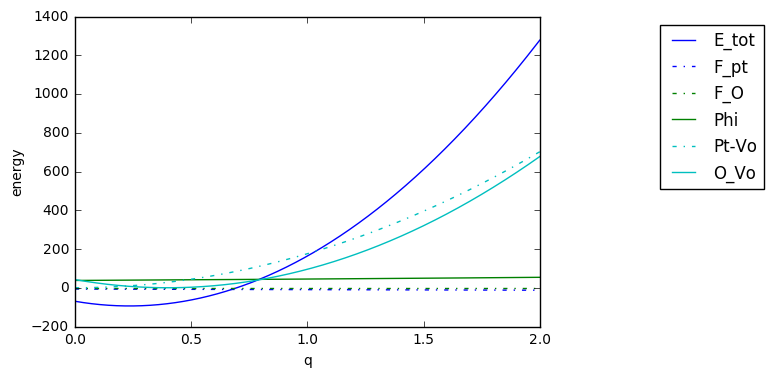

In [22]:
colors=['b','b-.', 'g-.','g','r-.','r','c-.','c','m-.','m','y-.','y'\
        , 'k-.']
lab.plot(q,Etot,colors[0],label="E_tot")
lab.plot(q,F_Pt,colors[1],label="F_pt")
lab.plot(q,F_O,colors[2],label="F_O")
lab.plot(q,phiPt_O,colors[3],label="Phi")
#lab.plot(q,Pt_self,colors[4],label="Pt_Self")
#lab.plot(q,O_self,colors[5],label="O_self")
lab.plot(q,Pt_selfWithoutV0,colors[6],label="Pt-Vo")
lab.plot(q,O_selfWithoutV0,colors[7],label="O_Vo")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.xlabel("q")
lab.ylabel("energy")

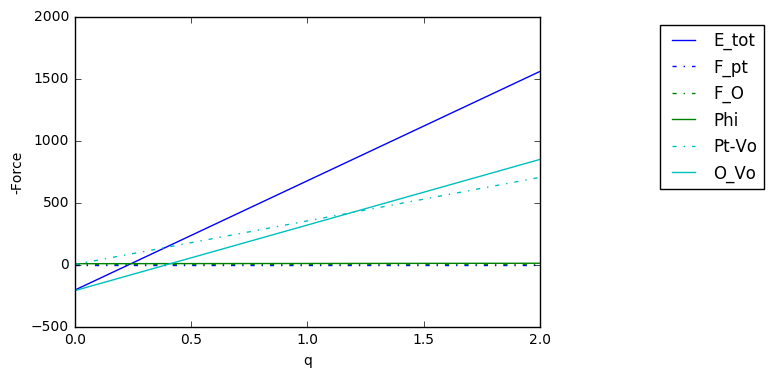

In [23]:
colors=['b','b-.', 'g-.','g','r-.','r','c-.','c','m-.','m','y-.','y'\
        , 'k-.']
def der(data,step):
    return (num.diff(data)/step)
q1=num.linspace(0,2,1000)
q1=q1[:-1]
step=q1[1]-q1[0]
lab.plot(q1,der(Etot,step),colors[0],label="E_tot")
lab.plot(q1,der(F_Pt,step),colors[1],label="F_pt")
lab.plot(q1,der(F_O,step),colors[2],label="F_O")
lab.plot(q1,der(phiPt_O,step),colors[3],label="Phi")
#lab.plot(q1,der(Pt_self,step),colors[4],label="Pt_Self")
#lab.plot(q1,der(O_self,step),colors[5],label="O_self")
lab.plot(q1,der(Pt_selfWithoutV0,step),colors[6],label="Pt-Vo")
lab.plot(q1,der(O_selfWithoutV0,step),colors[7],label="O_Vo")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.xlabel("q")
lab.ylabel("-Force")

(0, 10)

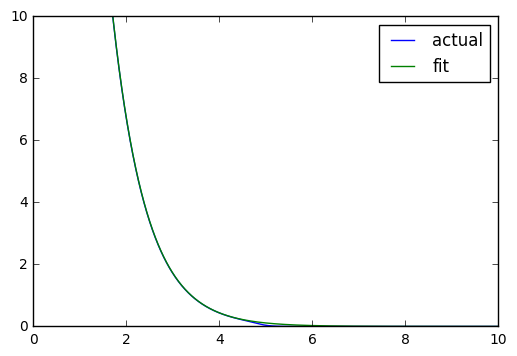

In [24]:
from scipy.optimize import curve_fit
def fit_func(x, a,b):
    return a*num.exp(-b*x)

r=num.linspace(0,10,1000)
den_pt=f(r,0,N_Pt,fe_Pt,beta_Pt,re_Pt,lambda_Pt)

params = curve_fit(fit_func,r , den_pt)

[a,b] = params[0]


lab.plot(r,f(r,0,N_Pt,fe_Pt,beta_Pt,re_Pt,lambda_Pt),label="actual")
lab.plot(r,fit_func(r,a,b),label="fit")
lab.legend()
lab.xlim([0,10])
lab.ylim([0,10])

In [27]:
a,b

(103.15305637408142, 1.3645801369829889)

In [53]:
fe_O

1.39479